# Analysis of the Ca8452 line

In [4]:
import sys
sys.path.append('D:/solar flares/data/2017-09-06')


In [5]:
import numpy as np
import copy
import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
import sunpy
from scipy.io import readsav
import cocopy as cp
from ISPy.io import solarnet
import sunpy.map
import astropy.units as u
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
import use_nessi3 as un
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection


# functies uittesten met CaIR

In [6]:
import os

# Specify the path to the folder you want to list files from
folder_path = "D:/solar flares/data/2014-09-06/fits/CaIR/"
"D:\solar flares\data\2014-09-06\fits\CaIR\crisp_l2_20140906_152724_8542_r00000.fits"

ntime = 618
print(f"number of indices: {ntime}")

def timeframe_to_filename_fits(frame):
    if frame <0 or frame >= ntime:
        raise IndexError(f'frame number {frame} is not in (0, {ntime}).')
    else:
        return f"{folder_path}\crisp_l2_20140906_152724_8542_r00{frame:03d}.fits"
ttff = timeframe_to_filename_fits


number of indices: 618


In [7]:
head0 = f.getheader(ttff(0))
head0, head0["DATE-AVG"]

(SIMPLE  =                    T / Written by IDL:  Sun Nov 19 15:31:56 2017      
 BITPIX  =                   16 / Number of bits per data pixel                  
 NAXIS   =                    3 / Number of data axes                            
 NAXIS1  =                 1473 /                                                
 NAXIS2  =                 1398 /                                                
 NAXIS3  =                   25 /                                                
 EXTEND  =                    T / FITS data may contain extensions               
 DATE    = '2017-11-19'         / Creation UTC (CCCC-MM-DD) date of FITS header  
 COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
 COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
 EXTNAME = 'Ca_II_8542'         /                                                
 SOLARNET=             0.500000 /                                                
 OBS_HDU =      

In [9]:
def tframe_to_time(frame):
    head0 = f.getheader(ttff(frame))
    t = head0["DATE-AVG"]
    return t[11:19]
time_list = [tframe_to_time(frame) for frame in range(ntime)]
time_list, len(time_list)

(['15:27:32',
  '15:27:43',
  '15:27:55',
  '15:28:06',
  '15:28:18',
  '15:28:30',
  '15:28:41',
  '15:28:53',
  '15:29:04',
  '15:29:16',
  '15:29:28',
  '15:29:39',
  '15:29:51',
  '15:30:02',
  '15:30:14',
  '15:30:25',
  '15:30:37',
  '15:30:49',
  '15:31:00',
  '15:31:12',
  '15:31:23',
  '15:31:35',
  '15:31:46',
  '15:31:58',
  '15:32:10',
  '15:32:21',
  '15:32:33',
  '15:32:44',
  '15:32:56',
  '15:33:07',
  '15:33:19',
  '15:33:31',
  '15:33:42',
  '15:33:54',
  '15:34:05',
  '15:34:17',
  '15:34:29',
  '15:34:40',
  '15:34:52',
  '15:35:03',
  '15:35:15',
  '15:35:27',
  '15:35:38',
  '15:35:50',
  '15:36:01',
  '15:36:13',
  '15:36:25',
  '15:36:36',
  '15:36:48',
  '15:36:59',
  '15:37:11',
  '15:37:23',
  '15:37:34',
  '15:37:46',
  '15:37:57',
  '15:38:09',
  '15:38:20',
  '15:38:32',
  '15:38:44',
  '15:38:55',
  '15:39:07',
  '15:39:18',
  '15:39:30',
  '15:39:42',
  '15:39:53',
  '15:40:05',
  '15:40:16',
  '15:40:28',
  '15:40:40',
  '15:40:51',
  '15:41:03',
  '15:

In [10]:
with f.open(timeframe_to_filename_fits(0)) as io :
    print(io)
    for hdl in io:
        print(hdl.data)
        print("Dat was nu nog zo'n hdl")
    wvl = io[-1].data
    print(wvl)
    print(np.shape(wvl))

extent = wvl[0]

print(wvl)

np.save('line_data/wav_sstCaIR.npy', wvl)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000020FD5175C10>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000020FD516A990>]
[[[1315 1315 1315 ... 1315 1315 1315]
  [1315 1315 1315 ... 1315 1315 1315]
  [1315 1315 1315 ... 1315 1315 1315]
  ...
  [1315 1315 1315 ... 1315 1315 1315]
  [1315 1315 1315 ... 1315 1315 1315]
  [1315 1315 1315 ... 1315 1315 1315]]

 [[1318 1318 1318 ... 1318 1318 1318]
  [1318 1318 1318 ... 1318 1318 1318]
  [1318 1318 1318 ... 1318 1318 1318]
  ...
  [1318 1318 1318 ... 1318 1318 1318]
  [1318 1318 1318 ... 1318 1318 1318]
  [1318 1318 1318 ... 1318 1318 1318]]

 [[1309 1309 1309 ... 1309 1309 1309]
  [1309 1309 1309 ... 1309 1309 1309]
  [1309 1309 1309 ... 1309 1309 1309]
  ...
  [1309 1309 1309 ... 1309 1309 1309]
  [1309 1309 1309 ... 1309 1309 1309]
  [1309 1309 1309 ... 1309 1309 1309]]

 ...

 [[1325 1325 1325 ... 1325 1325 1325]
  [1325 1325 1325 ... 1325 1325 1325]
  [1325 1325 1325 ... 1325 1325 1325]
  ...
  [1325 1325 1325 ... 1325 13

In [11]:
def datacube(timeframe):
    if timeframe < ntime and timeframe >= 0:
        return f.getdata(ttff(timeframe))
    else:
        raise IndexError(
            f"Timeframe {timeframe} is negative or exeeds numer of frames {ntime}."
        )

D:/solar flares/data/2014-09-06/fits/CaIR/\crisp_l2_20140906_152724_8542_r00000.fits
s=(25, 1398, 1473)
the shape of the data is (618, 1, 25, 1398, 1473)
the wavelengths are self._wavel = array([8543.23999971, 8543.33999974, 8543.43999976, 8543.53999979,
       8543.63999981, 8543.73999983, 8543.83999986, 8543.93999988,
       8544.0399999 , 8544.13999993, 8544.23999995, 8544.33999998,
       8544.44      , 8544.54000002, 8544.64000005, 8544.74000007,
       8544.8400001 , 8544.94000012, 8545.04000014, 8545.14000017,
       8545.24000019, 8545.34000021, 8545.44000024, 8545.54000026,
       8545.64000029], dtype='>f8')
self.zeros = [array([1315, 1318, 1309, 1287, 1262, 1234, 1205, 1176, 1149, 1120, 1079,
       1021,  983, 1009, 1064, 1110, 1139, 1167, 1198, 1231, 1264, 1293,
       1325, 1357, 1390], dtype='>i2')]
(1398, 1473) (1398, 1473)
Boundary
Blue=Outside, yellow=Inside


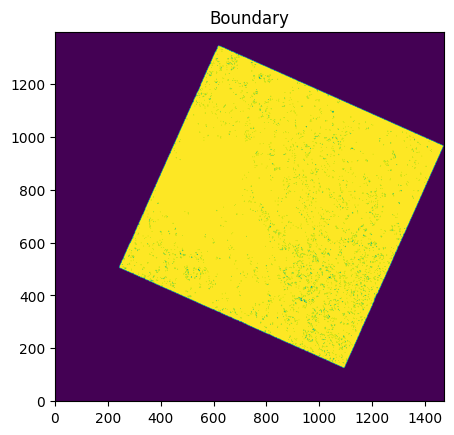

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


In [21]:
reload(un)
CaIR = un.SST_data_from_multiple_fits_files(timeframe_to_filename_fits,spectfilename='line_data/wav_sstCaIR.npy', number_of_frames=ntime,
                 time=time_list, name_of_line='CaIR14a', thresh=[0, np.percentile(f.getdata(ttff(0)), 99.5)],  boundary_methode='search',
                 boundary_arguments = {"error":0.01, "index_of_zero":5}, with_stokes=False, with_time=False)




In [22]:
# CaIR.calculate__FOV_spect_over_time()


In [23]:
secs = un.get_TIME(CaIR)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} seconds for this line!")
print(f'{CaIR.shape=}')

the mean cadence is 11.568881685575368 seconds for this line!
CaIR.shape=(618, 1, 25, 1398, 1473)


The guessed filters are [[3.666666666666667, 3.125], [12.0, 3.125], [20.333333333333332, 3.125]]


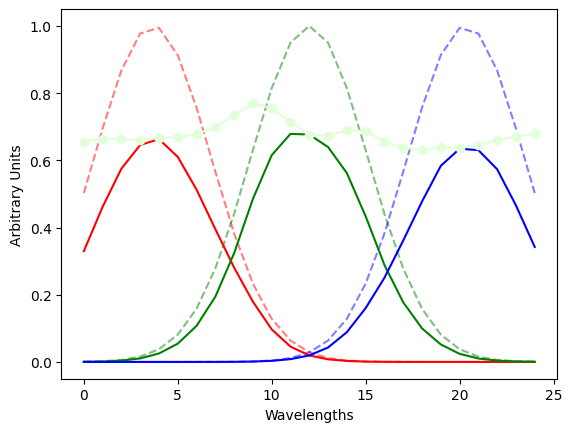

In [24]:
# %matplotlib inline
CaIR.update_filters(None)
CaIR.plot_filt(880,900)
plt.show()

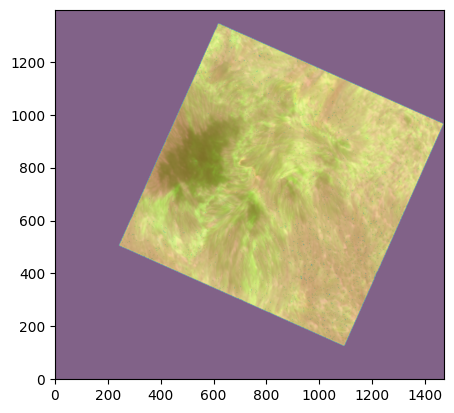

(1398, 1473, 3)


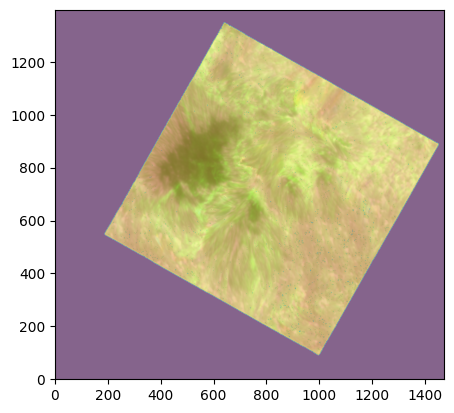

(1398, 1473, 3)


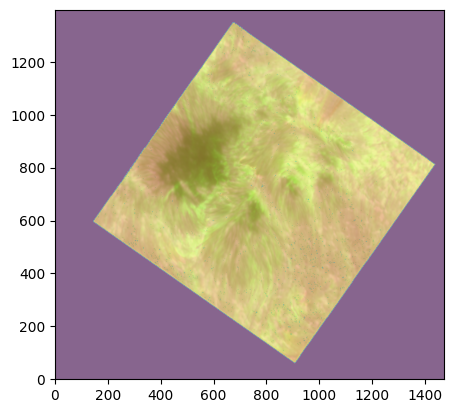

(1398, 1473, 3)


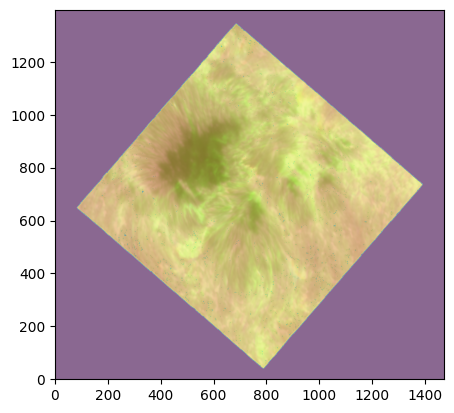

(1398, 1473, 3)


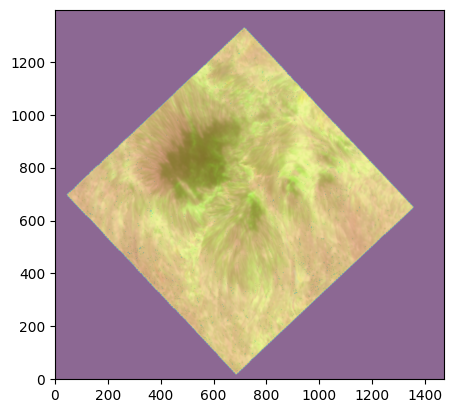

(1398, 1473, 3)


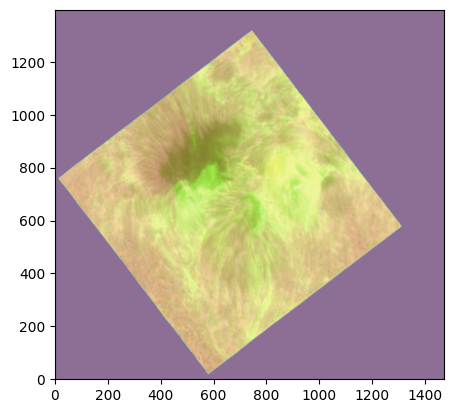

(1398, 1473, 3)


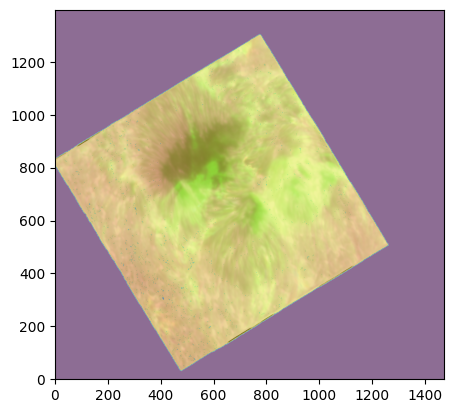

(1398, 1473, 3)


In [25]:
# %matplotlib widget
for frame in range(0,CaIR._number_of_frames, 100):
    # frame=0
    CaIR.ccp_frame(frame,Show=False)
    plt.imshow(CaIR.current_ccp, origin='lower')
    plt.imshow(CaIR.calculate_boundary(frame=frame, error=0.0005), alpha=0.4, origin="lower")

    # plt.imshow(CaIRundary, origin='lower', alpha=0.2)
    plt.show()
    print(np.shape(CaIR.current_ccp))#,np.shape(CaIR.boundary))

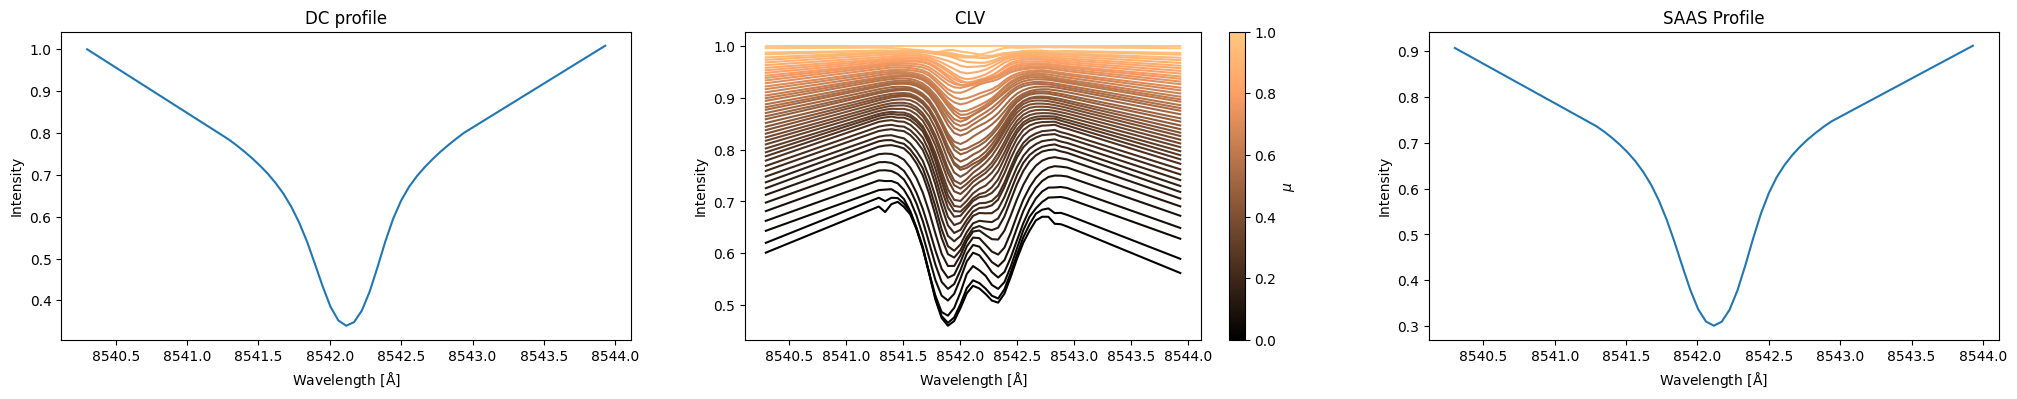

8542.114877954633 8542.114877954633


In [26]:
reload(un)
atlas = f.getdata('D:/solar flares/data/2017-09-06/fits/solar_atlas_V1_405-1065.fits')
theor_CaIR = un.linestudier('D:/solar flares/data/2017-09-06/fits/8542_clv.fits', atlas=atlas, nr=101)
print(np.median(theor_CaIR.sst_wav), np.mean(theor_CaIR.sst_wav))

## Calculating the $\mu$ !!!!! 


In [27]:
CaIR.shape

(618, 1, 25, 1398, 1473)

In [30]:
def timeframe_to_extent(frame, timeframe_to_filename_fits):
    head = f.getheader(timeframe_to_filename_fits(frame))
    x = head["CRVAL1"]
    y = head["CRVAL2"]
    Dx = head['CDELT1'] 
    Dy = head['CDELT2']
    ny, nx = CaIR.shape[-2:]
    nx0 = head['CRPIX1']
    ny0 = head['CRPIX2']
    extent = [x - Dx*nx0, x + Dx*(nx-nx0), y - Dy*ny0, y + Dy*(ny-ny0), ]

    print(f"extent timeframe {frame} is ", extent)
    return extent

def calculate_mu(x,y, radius=959.63):
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    rad_dist =  (x**2 + y**2)**0.5/radius
    return np.cos(np.arcsin(rad_dist))

import numpy as np

def rotate_mesh_around_average(xx, yy, angle):
  """
  Rotates an xy mesh around its average position.

  Args:
      xx: A 2D NumPy array representing the x-coordinates of the mesh.
      yy: A 2D NumPy array representing the y-coordinates of the mesh.
      angle: The rotation angle in radians. Positive values represent counter-clockwise rotation.

  Returns:
      A tuple of 2D NumPy arrays representing the rotated x and y coordinates (xx_rot, yy_rot).
  """

  # Calculate the average x and y coordinates
  avg_x = np.mean(xx)
  avg_y = np.mean(yy)

  # Shift the mesh to center it around the average
  xx_centered = xx - avg_x
  yy_centered = yy - avg_y

  # Rotate the centered mesh coordinates
  xx_rot = np.cos(angle) * xx_centered -np.sin(angle) * yy_centered  + avg_x
  yy_rot = np.sin(angle) * xx_centered + np.cos(angle) * yy_centered + avg_y

  return xx_rot, yy_rot



def extent_to_grid(extent, shape, invert=False, angle=0):

    x = np.linspace(extent[0], extent[1], shape[4])
    y = np.linspace(extent[2], extent[3], shape[3])
    if invert:
        x = x[::-1]
        y = y[::-1]

    xx, yy = np.meshgrid(x, y)
    if angle != 0:
        xx, yy = rotate_mesh_around_average(xx, yy, angle)

    MU = calculate_mu(xx,yy)
    print("does MU contain nan's?", np.any(np.isnan(MU)))
    return xx, yy, MU


def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]

def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name=""):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.frame_integrated_spect(timeFrame)
        over.ccp_frame(timeFrame, Show=False)
        ax.imshow(Image.fromarray(over.current_ccp), origin='lower', extent=extent)
        K = MU * np.where(over.boundary==0, np.nan, 1)
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    CS = ax.contour(X, Y, MU)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 

extent timeframe 0 is  [-779.682, -695.721, -352.001, -272.315]
does MU contain nan's? False
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.560611802760534 for timeframe 0
Coundourplot succesfully saved.


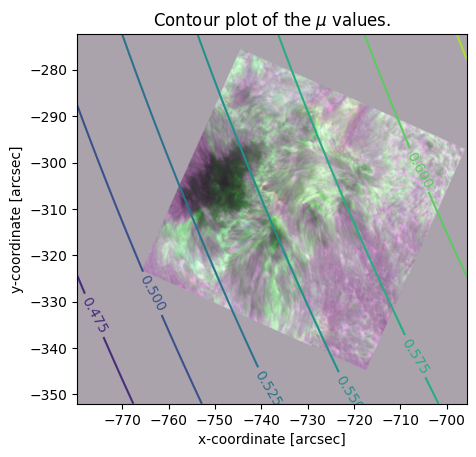

In [31]:

frame = 0
extent = timeframe_to_extent(frame, ttff)
xx, yy, MU = extent_to_grid(extent, CaIR.shape, invert=False, angle=0)
xx0=xx
yy0=yy

mu = give_mu_contourplot(
    MU,
    xx,
    yy,
    extent,
    over=CaIR,
    save=True,
    save_name=CaIR.name_of_line,
    timeFrame=frame,
)
sst_data = CaIR
theor_line = theor_CaIR
set_mu(CaIR, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_CaIR.index_mu], theor_line.sst_clv[theor_CaIR.index_mu][0], clv_fit(mu, theor_line)


0.0009563797056326819


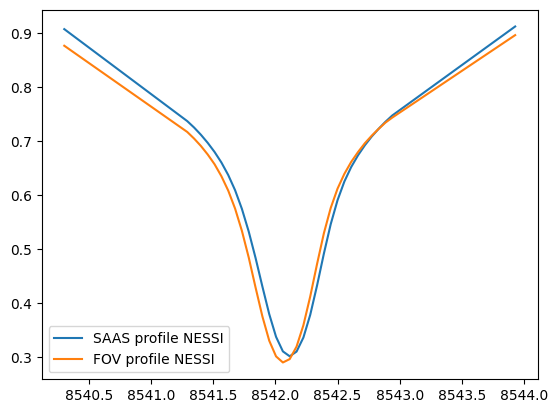

In [32]:
theor_CaIR.set_fov( xx, yy, CaIR.boundary, sr=959.63)


## Finding a suitable quiet sun patch

In [33]:
frame, CaIR.shape

(0, (618, 1, 25, 1398, 1473))

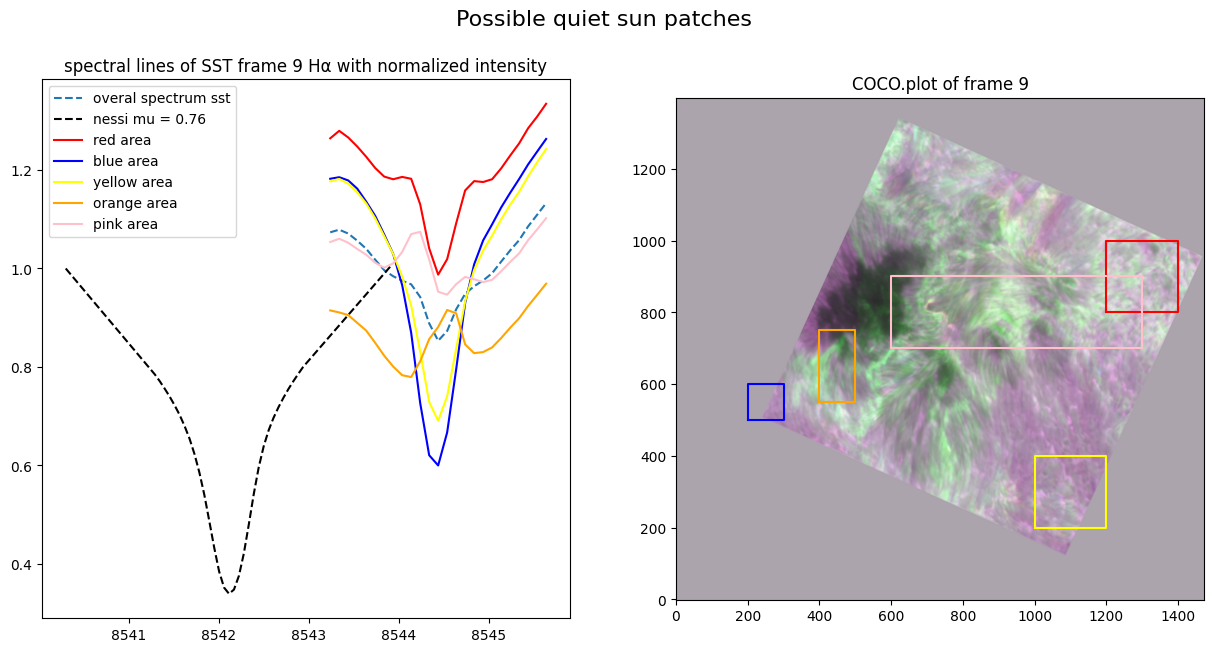

In [34]:
frame=9

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

CaIR.ccp_frame(frame,Show=False)
# xlim, ylim
X = [[(1200,1400),(800,1000)], [(200,300), (500, 600)], [(1000, 1200), (200, 400)], [(400,500),(550,750)], [(600,1300),(700, 900)]]
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title(
    f"spectral lines of SST frame {frame}"
    + " H\u03B1 with normalized intensity"
)
CaIR.frame_integrated_spect(frame)
ax[0].plot(CaIR._wavel, CaIR.av_spect, '--', label='overal spectrum sst')
# ax[0].plot(theor_CaIR.sst_wav + theta[0], theta[2] * theor_CaIR.sst_dc + theta[1], label='saas nessi')
# theta = [ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = [0,0,1]


ax[0].plot(theor_CaIR.sst_wav + theta[0], theta[2] * theor_CaIR.sst_dc*theor_CaIR.sst_clv[0] + theta[1], '--', label='nessi mu = 0.76', color='black')

ax[1].imshow(CaIR.current_ccp,origin='lower')
ax[1].set_title("COCO.plot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)

    ax[0].plot(CaIR._wavel, CaIR.frame_integrated_spect(frame, xlim=xlim, ylim=ylim), color=color, label=str(color)+' area') #
ax[0].legend()

# Save the figure
fig.savefig(f'plots\Choosing_quiet_sun_patch_CaIR.png')
plt.show()


### Choose patch as quiet sun

fill in here which color the wanted quiet sun patch had 

In [35]:
color_wanted_patch = 'yellow'

In [36]:
np.shape(theor_CaIR.fov[0])

(1398, 1473)

the edges of the patch are denoted by the xlim: (1000, 1200) and ylim: (200, 400)


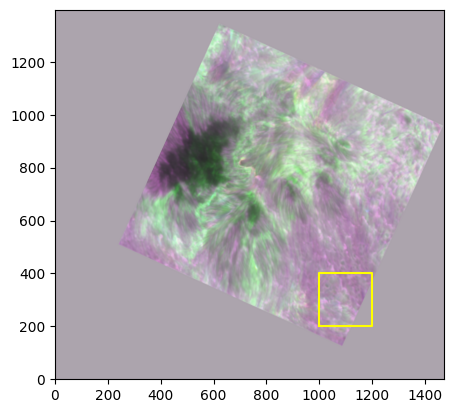

The quiet sun is pick at x (-716.9679242527174, -334.9172798854689) with average              mu 0.5656781613312561


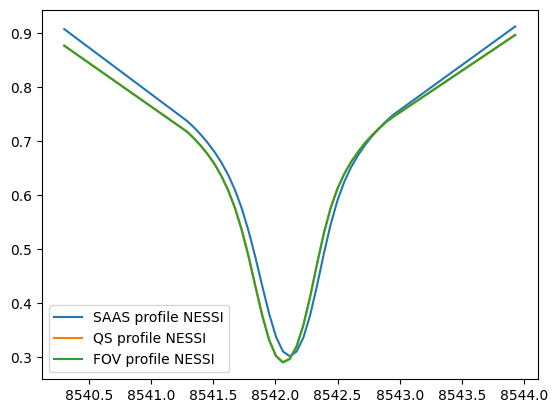

{'frame': 9, 'xlim': (1000, 1200), 'ylim': (200, 400), 'color': 'yellow'}

In [37]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)
reload(un)
CaIR.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
plt.show()
theor_CaIR.set_quiet_sun(xlim=xlim, ylim=ylim, show=True)
CaIR.quiet_sun

[8543.23999971 8543.33999974 8543.43999976 8543.53999979 8543.63999981
 8543.73999983 8543.83999986 8543.93999988 8544.0399999  8544.13999993
 8544.23999995 8544.33999998 8544.44       8544.54000002 8544.64000005
 8544.74000007 8544.8400001  8544.94000012 8545.04000014 8545.14000017
 8545.24000019 8545.34000021 8545.44000024 8545.54000026 8545.64000029]
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 189.13876875150444
        x: [ 2.370e+00  4.117e-01  9.979e-01]
      nit: 15
      jac: [ 1.144e-05  7.629e-06  3.815e-06]
 hess_inv: [[ 8.892e-06 -5.908e-06  8.889e-06]
            [-5.908e-06  5.348e-06 -5.918e-06]
            [ 8.889e-06 -5.918e-06  8.902e-06]]
     nfev: 184
     njev: 46


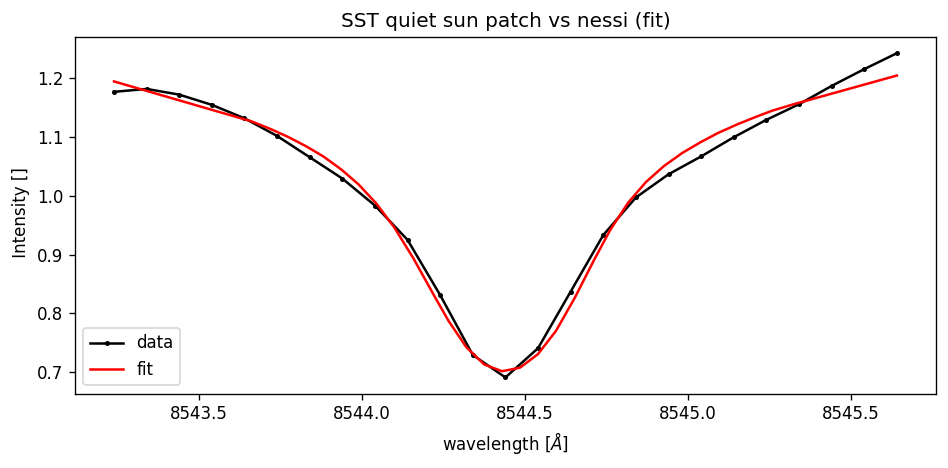

de p-waarde is  0.9951862859539494 
Chi^2 reduced= 8.597216761432021 
aantal vrijheidgraden= 22 
chi^2= 189.13876875150444
we behouden de fit tot op een betrouwbaarheidsniveau van  0.9951862859539494 
Oftewel verwerp als p-waarde <lpha-niveau 


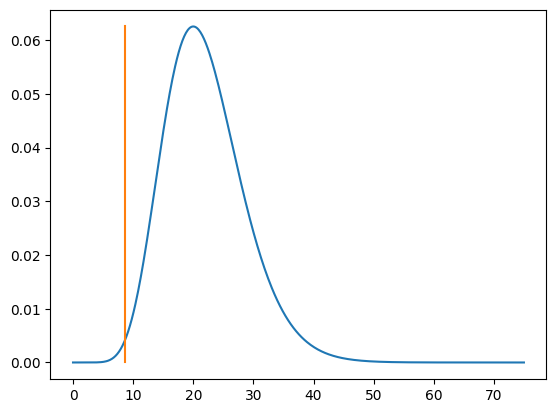

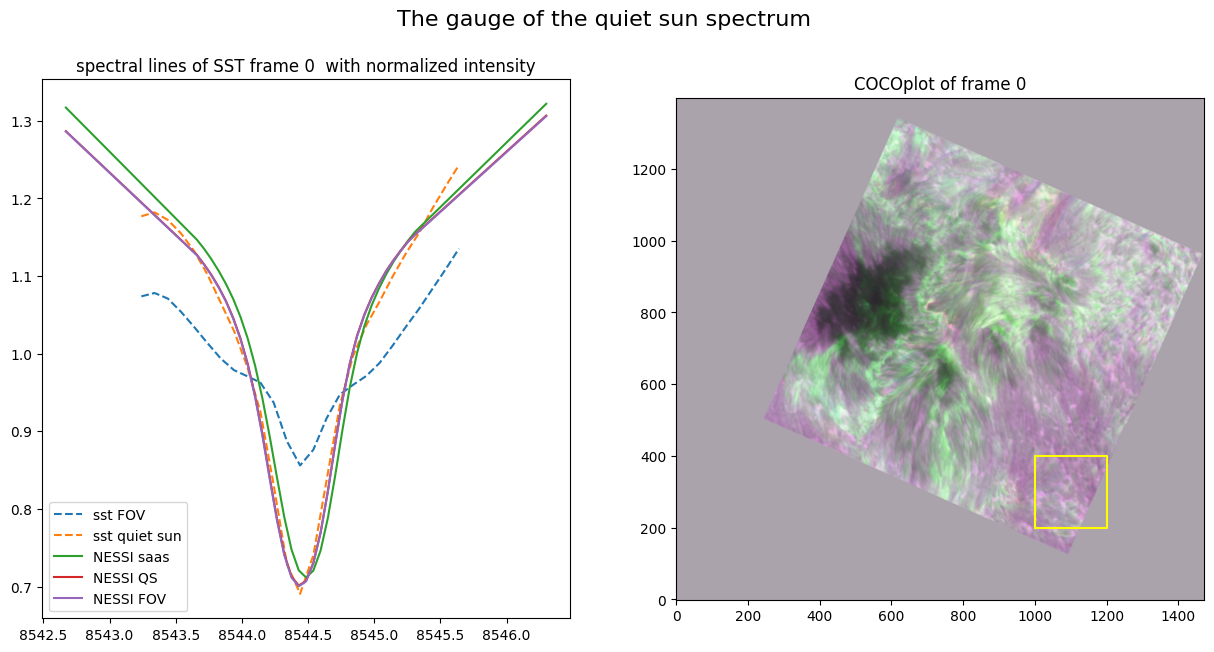

In [38]:
reload(un)
un.fit_qs_to_NESSI(theor_CaIR, CaIR)

## The full FOV integrated spectrum over time:

In [39]:
CaIR.calculate__FOV_spect_over_time()

In total 618 frames.
Now calculating frame:
617

# Figure 4 In HARPS ALEX
![image.png](attachment:image.png)

Now we do it for the FOV spectum with as normalisation the quiet sun

[4.17927824 3.23292355 2.74692828 2.47357644 2.27787256 2.11342902
 1.85241835 1.4633736  1.03942492 0.74247173 0.58153256 0.5468212
 0.61513688 0.83420995 1.2403785  1.60717359 1.78034306 2.06608033
 2.48545241 3.12835193 3.50436319] [1.2126105  1.18630192 1.15403501 1.08942213 1.03026996 0.93288987
 0.76058127 0.52402681 0.3219441  0.19191975 0.13262537 0.12816198
 0.17308266 0.29168661 0.47892614 0.64614961 0.74175939 0.87928611
 1.01521028 1.18527166 1.35401083] [2.96666774 2.04662163 1.59289327 1.38415431 1.2476026  1.18053915
 1.09183708 0.93934679 0.71748082 0.55055198 0.44890718 0.41865922
 0.44205422 0.54252334 0.76145236 0.96102398 1.03858366 1.18679422
 1.47024213 1.94308027 2.15035236]


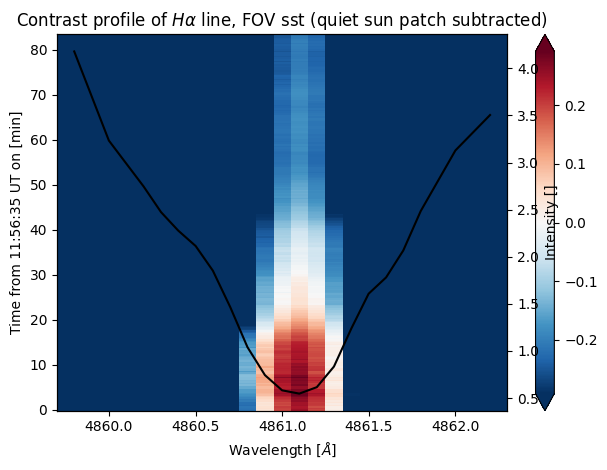

In [ ]:
TIME = un.get_TIME(CaIR)

FOV_spectrum = CaIR.FOV_spectrum
QS = sst_data.quiet_spect
QS2 = theor_line.adapted_fov_spectr()(sst_data._wavel)
print(QS, QS2, QS - QS2)
Z = FOV_spectrum - QS
x = sst_data._wavel
y = CaIR.TIME
TIME = y
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of $H\alpha$ line, FOV sst (quiet sun patch subtracted)')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,QS, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

[-1.37655439  0.10628399  1.17647059]
[[1.30269158 1.13845138 1.13587336 ... 1.13102631 1.12232231 1.07057212]
 [1.35597251 1.18400191 1.1643885  ... 1.13048859 1.13719421 1.08521274]
 [1.34328351 1.18914365 1.16543313 ... 1.13370809 1.13361522 1.06696365]
 ...
 [1.77394991 1.37533426 1.19101278 ... 1.0648624  1.2521959  1.34457111]
 [1.75117433 1.35967907 1.17952222 ... 1.05594107 1.24963922 1.3288288 ]
 [1.77930102 1.37654158 1.1927802  ... 1.07908823 1.26789969 1.34742565]] [1.2126105  1.18630192 1.15403501 1.08942213 1.03026996 0.93288987
 0.76058127 0.52402681 0.3219441  0.19191975 0.13262537 0.12816198
 0.17308266 0.29168661 0.47892614 0.64614961 0.74175939 0.87928611
 1.01521028 1.18527166 1.35401083]


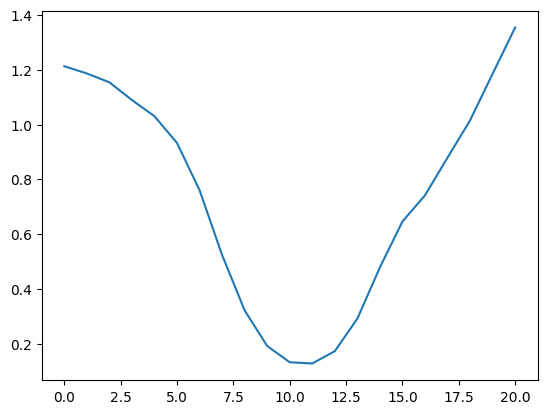

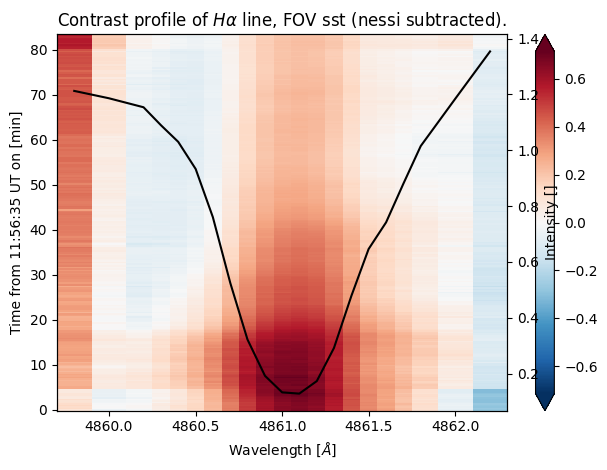

In [ ]:
theta = theor_CaIR.theta
print(theta)
theor_line = theor_CaIR

sst_data = CaIR
QS = theor_CaIR.adapted_fov_spectr()(sst_data._wavel)
plt.plot(QS)
print(FOV_spectrum, QS)
Z = FOV_spectrum - QS
x = sst_data._wavel
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of $H\alpha$ line, FOV sst (nessi subtracted).')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,QS, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [ ]:
CaIR.stand_dev_quiet_sun()

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

In [ ]:
reload(un)
un.save_for_further_analysis(CaIRheor_CaIR)
